<h1><font color="seagreen">Course Project on Machine Learning</font></h1>
<hr>

<h3><font color="blue">Project Guide - Prof. Jitendra Singh Thakur Sir</font></h3>

<h2><font><table>
    <th><th>
    <th>Name</th>
    <th>Roll no.</th>
    <tr>
        <td rowspan="4" colspan="2"><img src="https://img.collegepravesh.com/2018/11/JEC-Jabalpur-Logo.png"></td>
        <td>Satakshi Dubey</td>
        <td>0201cs171063</td>
    </tr>
    <tr>
        <td>Vanshita Bansal</td>
        <td>0201cs171089</td>
    </tr>
    <tr>
        <td>Mansi Gupta</td>
        <td>0201cs171042</td>
    </tr>
    <tr>
        <td>Himani Gupta</td>
        <td>0201cs171034</td>
    </tr>
</table></font></h2>

<h2><font color="blue">Problem Name - Early Stage Alzheimer Disease Detection</font></h2>
<h3><font color="blue">Dataset source - Kaggle</font></h3>

<img src="https://www.roche.com/dam/jcr:fee71abd-0cde-4672-b684-20c438641c5a/Alzheimer%E2%80%99s_Hero.jpg" 
     width="540px" height="360px">

- Alzheimer's disease (AD) is a neurodegenerative disorder of uncertain cause and pathogenesis that primarily affects older adults and is the most common cause of dementia.


- The earliest clinical manifestation of AD is selective memory impairment and while treatments are available to ameliorate some symptoms, there is no cure currently available.


- Studies have suggested that MRI features may predict rate of decline of AD and may guide therapy in the future.


- However in order to reach that stage clinicians and researchers will have to make use of machine learning techniques that can accurately predict progress of a patient from mild cognitive impairment to dementia.

### The Clinical Dementia Rating or CDR is a numeric scale used to quantify the severity of symptoms of dementia (i.e. its 'stage'). 

<table>
    <th>CDR Rating</th>
    <th>Symptoms</th>
    <tr>
        <td>0</td>
        <td>none</td>
    </tr>
    <tr>
        <td>0.5</td>
        <td>very mild</td>
    </tr>
    <tr>
        <td>1</td>
        <td>mild</td>
    </tr>
    <tr>
        <td>2</td>
        <td>moderate</td>
    </tr>
    <tr>
        <td>3</td>
        <td>severe</td>
    </tr>
</table>

<hr>

## <font color="blue">1. Import Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import sklearn

import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

"""if you face any 'module not found' or library missing issues"""
"""please install it executing the following command in a new jupyter-cell itself"""
""" !pip install {module-name} such as !pip install seaborn"""

' !pip install {module-name} such as !pip install seaborn'

## <font color="blue">2. Import dataset

In [2]:
data_long = pd.read_csv('oasis_longitudinal.csv')

In [3]:
data_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


COLUMN DESCRIPTORS  

|COL  |FULL-FORMS                          |
|-----|------------------------------------|
|EDUC |Years of education                  |
|SES  |Socioeconomic Status                |
|MMSE |[Mini Mental State Examination](http://www.dementiatoday.com/wp-content/uploads/2012/06/MiniMentalStateExamination.pdf)       |
|CDR  |[Clinical Dementia Rating](http://knightadrc.wustl.edu/cdr/PDFs/CDR_Table.pdf)            |
|eTIV |[Estimated Total Intracranial Volume](https://link.springer.com/article/10.1007/s12021-015-9266-5) |
|nWBV |[Normalize Whole Brain Volume](https://www.ncbi.nlm.nih.gov/pubmed/11547042)        |
|ASF  |[Atlas Scaling Factor](http://www.sciencedirect.com/science/article/pii/S1053811904003271)                |

In [4]:
data_long.Group.unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [5]:
data_long.groupby('Group')['CDR'].count()

Group
Converted       37
Demented       146
Nondemented    190
Name: CDR, dtype: int64

### Drop unnecessary columns - MRI Id and Visit columns do not help in predicting anything

In [6]:
data_long.drop(['MRI ID'], axis=1, inplace=True)
data_long.drop(['Visit'], axis=1, inplace=True)
data_long.drop(['Subject ID'], axis=1, inplace=True)

<hr>

## <font color="blue">3. Handling Missing Data

In [7]:
"""store all column names in data_columns list"""
data_columns = data_long.columns

"""store length of dataset"""
data_len = len(data_long)

In [8]:
"""function to get missing values information of the dataset"""
def get_missing_info(data_long, data_columns):
    temp = []
    for col in data_columns:    
        info = {}
        info['column_name'] = col
        info['num_of_missing_values'] = data_len - data_long[col].count()
        info['sample_data'] = data_long[col][0]
        info['datatype'] = data_long[col].dtypes
        temp.append(info)
    
    # create dataframe to show missing values
    missing_df = pd.DataFrame(data=temp)

    # only store the rows where missing values > 0
    missing_df = missing_df[missing_df.num_of_missing_values > 0]
    return missing_df

"""call function"""
get_missing_info(data_long, data_columns)

,column_name,num_of_missing_values,sample_data,datatype
6,SES,19,2,float64
7,MMSE,2,27,float64


### So we have to fill in the missing values in 'SSE' & 'MMSE' columns. Since the values to be imputed are not much we can use ffill method to fill values. 

In [9]:
data_long = data_long.fillna(method='ffill')

In [10]:
"""calling the function again to test whether missing values are filled"""
get_missing_info(data_long, data_columns)

,column_name,num_of_missing_values,sample_data,datatype


### Since no rows gets displayed above therefore now there is now column with any missing value.

In [11]:
data_long.describe()

,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,595.104558,77.013405,14.597855,2.455764,27.335121,0.290885,1488.128686,0.729568,1.195461
std,635.485118,7.640957,2.876339,1.134171,3.674641,0.374557,176.139286,0.037135,0.138092
min,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


<hr>

## <font color="blue">4. Handling Categorical Data

In [12]:
for col in data_columns:
    if data_long[col].dtypes == "object":
        print(col, end=" - ")
        print(data_long[col].unique())

Group - ['Nondemented' 'Demented' 'Converted']
M/F - ['M' 'F']
Hand - ['R']


### We have three categorical columns to fix - 'Group' | 'M/F' | 'Hand' 

In [13]:
"""Since the column Hand has only one value 'R' for all the rows, we can drop that column"""
data_long.drop(['Hand'], axis=1, inplace=True)

### We will also convert different CDR ratings to categorical variable A,B,C,D because it is a classification problem

In [14]:
data_long['CDR'].replace(to_replace=0.0, value='A', inplace=True)
data_long['CDR'].replace(to_replace=0.5, value='B', inplace=True)
data_long['CDR'].replace(to_replace=1.0, value='C', inplace=True)
data_long['CDR'].replace(to_replace=2.0, value='D', inplace=True)

### Applying Label Encoder to convert all categorical columns to numerical columns

In [15]:
from sklearn.preprocessing import LabelEncoder

f = LabelEncoder()
data_long['M/F'] = f.fit_transform(data_long['M/F'])
data_long['CDR'] = f.fit_transform(data_long['CDR'])


"""WE ALSO SEE THAT ATTRIBUTES 'GROUP' AND 'CDR' ESSENTIALLY MEAN THE SAME."""
"""THEREFORE WE WILL DROP 'GROUP' AS THERE IS NO POINT IN USING THAT FOR CLASSIFICATION."""

data_long.drop('Group', axis=1, inplace=True)

### Notice that all columns (previously categorical such as M/F) are now changed to numerical columns (including CDR)

In [16]:
data_long.head()

,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,87,14,2.0,27.0,0,1987,0.696,0.883
1,457,1,88,14,2.0,30.0,0,2004,0.681,0.876
2,0,1,75,12,2.0,23.0,1,1678,0.736,1.046
3,560,1,76,12,2.0,28.0,1,1738,0.713,1.010
4,1895,1,80,12,2.0,22.0,1,1698,0.701,1.034


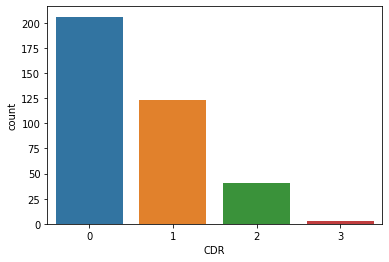

In [17]:
"""Plotting count of patients with CDR values; where 0 = no alzheimers & 3 = severe alzheimer"""
sns.countplot(data_long.CDR)

## <font color="blue">5. Feature Engineering

In [18]:
"""count of patients with different CDR ratings"""
data_long.groupby('CDR')['MMSE'].count()

CDR
0    206
1    123
2     41
3      3
Name: MMSE, dtype: int64

<font color="red">
We observed that the values for CDR == 1,2,3 are very less as compared to count of values for CDR == 0.
<br>
Therefore, we can combine the CDR classes 1,2,3 into one class.
<br>
Hence, we will have two values for CDR now - 0 == Non-Demented and 1 == Demented.</h4>

In [19]:
for i in range(len(data_long)):
    rating = data_long.CDR[i]
    
    """if CDR rating = 1 or 2 or 3 we group them"""
    if rating > 0:
        data_long['CDR'].iloc[i] = 1

### MMSE value observation

In [20]:
data_long.groupby('CDR')['MMSE'].max()

CDR
0    30.0
1    30.0
Name: MMSE, dtype: float64

In [21]:
data_long.groupby('CDR')['MMSE'].min()

CDR
0    25.0
1     4.0
Name: MMSE, dtype: float64

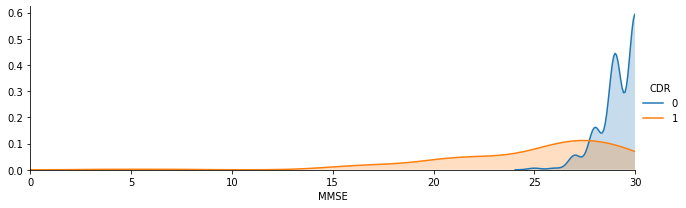

In [22]:
facet= sns.FacetGrid(data_long, hue="CDR", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, data_long['MMSE'].max()))
facet.add_legend()

<font color="red"><i><h3>MMSE - The Mini-Mental State Examination or Folstein test is a 30-point questionnaire that is used extensively in clinical and research settings to measure cognitive impairment/dementia.
<br><br>
We also observe that the values for MMSE highly affect the CDR value. The higher the value of MMSE, higher the chances of patient being undemented.
<br><br>    
Therefore, we can introduce a new variable called 'MMSE_group' in our data to distribute values of MMSE into bins. 

In [23]:
data_long['MMSE_group'] = ""

for i in range(len(data_long)):
    mmse = data_long.MMSE[i]
    if mmse >= 27 and mmse <= 30:
        data_long['MMSE_group'][i] = 0
    else:
        data_long['MMSE_group'][i] = 1
        
data_long['MMSE_group'] = pd.to_numeric(data_long['MMSE_group'])

## Correlation Analysis

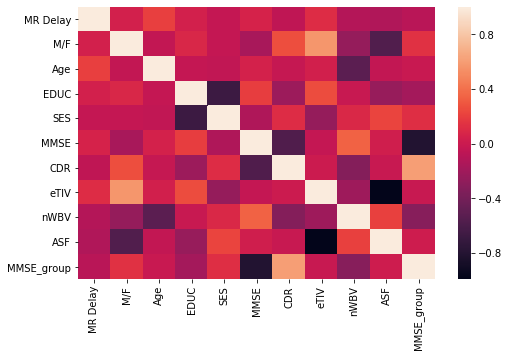

In [24]:
corr_matrix = data_long.corr()

from pylab import rcParams
# set figure size
rcParams['figure.figsize'] = 8, 5

# plotting corr_matrix using sns library
sns.heatmap(corr_matrix)

In [25]:
"""Correlation values of columns with the target column 'CDR'"""

print("Correlation values of columns with the target column CDR")
corr_matrix['CDR']

Correlation values of columns with the target column CDR


MR Delay     -0.053279
M/F           0.265416
Age          -0.020659
EDUC         -0.217428
SES           0.118466
MMSE         -0.571461
CDR           1.000000
eTIV          0.008015
nWBV         -0.325932
ASF          -0.013254
MMSE_group    0.605809
Name: CDR, dtype: float64

### We observe that columns MMSE, MMSE_group, nWBV are the top correlated features with target column CDR from the dataset

In [26]:
"""since eTIV has correlation value of 0.008 --> it is not related with CDR."""
"""Hence, we will drop this feature as it becomes unnecessary for our model."""

data_long.drop('eTIV', axis=1, inplace=True)

## <font color="blue">6. Model Training

In [27]:
# install scikit-plot if not already installed 
# !pip install -q scikit-plot 

In [28]:
"""we use joblib to save and load the ml models"""
import joblib

"""we use scikitplot to plot the confusion matrix"""
import scikitplot as skplt

from sklearn.metrics import classification_report

### Splitting Dataset

In [29]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_long, test_size = 0.25, random_state=10)

In [30]:
print("Number of rows in training set = ", len(train))
print("Number of rows in test set = ", len(test))

Number of rows in training set =  279
Number of rows in test set =  94


### We have to predict CDR

In [31]:
print(data_long.columns)

Index(['MR Delay', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'nWBV', 'ASF',
       'MMSE_group'],
      dtype='object')


In [32]:
X_train = train[['MR Delay', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'nWBV', 'ASF']]
y_train = train.CDR

X_test = test[['MR Delay', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'nWBV', 'ASF']]
y_test = test.CDR

In [33]:
print("X_train.shape - ", X_train.shape)
print("y_train.shape - ", y_train.shape)
print("X_test.shape - ", X_test.shape)
print("y_test.shape - ", y_test.shape)

X_train.shape -  (279, 8)
y_train.shape -  (279,)
X_test.shape -  (94, 8)
y_test.shape -  (94,)


### Scaling our data

<table>
    <thead>
        <th>Algorithm</th>
        <th>Distance Dependent?</th>
        <th>Scaling Required</th>
    </thead>
    <tbody>
        <tr>
            <td>1. Logistic Regression</td>
            <td>No</td>
            <td>No</td>
        </tr>
        <tr>
            <td>2. Decision Tree</td>
            <td>No</td>
            <td>No</td>
        </tr>
        <tr>
            <td>3. Random Forest</td>
            <td>No</td>
            <td>No</td>
        </tr>
        <tr>
            <td>4. KNN</td>
            <td>Yes</td>
            <td>Yes</td>
        </tr>
        <tr>
            <td>5. SVM</td>
            <td>Yes</td>
            <td>Yes</td>
        </tr>

In [34]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_scaled_train = scaler.transform(X_train)

# Scale the test set
X_scaled_test = scaler.transform(X_test)

In [35]:
"""we will store accuracies of every classifier in a dictionary to display at last"""
accuracy_dict = {}

## <font color="blue">6.1 Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(solver='liblinear')
lr_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
lr_classifier = joblib.load('lr_model.sav')
lr_prediction = lr_classifier.predict(X_test)

lr_accuracy = lr_classifier.score(X_test, y_test)
lr_accuracy = round(lr_accuracy, 4)*100

accuracy_dict['LogisticRegression'] = lr_accuracy
print('Accuracy of prediction - ', lr_accuracy)

Accuracy of prediction -  85.11


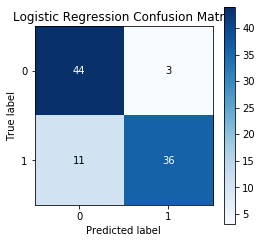

In [38]:
"""CONFUSION MATRIX"""
skplt.metrics.plot_confusion_matrix(y_test, lr_prediction, figsize=(4,4), 
                                   title="Logistic Regression Confusion Matrix")

### Classification Report

In [39]:
print(classification_report(y_test, lr_prediction))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        47
           1       0.92      0.77      0.84        47

    accuracy                           0.85        94
   macro avg       0.86      0.85      0.85        94
weighted avg       0.86      0.85      0.85        94



## <font color="blue">6.2 Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=6)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
dt_classifier = joblib.load('dt_model.sav')
dt_prediction = dt_classifier.predict(X_test)

dt_accuracy = dt_classifier.score(X_test, y_test)
dt_accuracy = round(dt_accuracy, 4)*100

accuracy_dict['DecisionTree'] = dt_accuracy
print('Accuracy of prediction - ', dt_accuracy)

Accuracy of prediction -  95.74000000000001


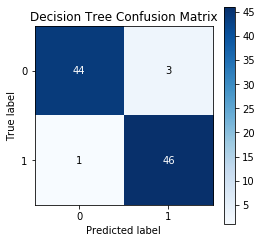

In [42]:
"""CONFUSION MATRIX"""
skplt.metrics.plot_confusion_matrix(y_test, dt_prediction, figsize=(4,4), 
                                   title="Decision Tree Confusion Matrix")

### Visualizing the Decision Tree

In [43]:
from sklearn import tree
import graphviz
import pydotplus

dot_data = tree.export_graphviz(dt_classifier, feature_names=X_test.columns,
                               filled=True, rounded=True, special_characters=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('alzheimer_decision_tree.png')
pydot_graph.set_size('"5,5!"')

<img src="alzheimer_decision_tree.png">

### <font color = "red">For better visual please check the project folder for decision tree image named - 'alzheimer_decision_tree.png' or click the link below - 

https://drive.google.com/file/d/14mhukEF1k_mxXRU1fnrCiDWPxUUo_mvj/view?usp=sharing

### Classification Report

In [44]:
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.94      0.98      0.96        47

    accuracy                           0.96        94
   macro avg       0.96      0.96      0.96        94
weighted avg       0.96      0.96      0.96        94



## <font color="blue">6.3 Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=300, max_depth=6)
rf_classifier.fit(X_train, y_train)

rf_classifier = joblib.load('dt_model.sav')
rf_prediction = rf_classifier.predict(X_test)
rf_accuracy = rf_classifier.score(X_test, y_test)
rf_accuracy = round(rf_accuracy, 4)*100
accuracy_dict['RandomForest'] = rf_accuracy
print('Accuracy of prediction - ', rf_accuracy)

Accuracy of prediction -  95.74000000000001


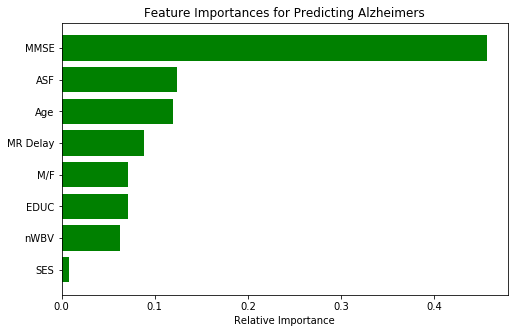

In [46]:
features = X_test.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances for Predicting Alzheimers')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

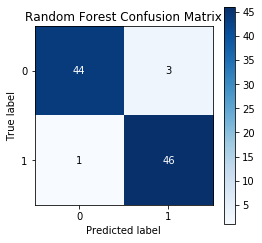

In [47]:
"""CONFUSION MATRIX"""
skplt.metrics.plot_confusion_matrix(y_test, rf_prediction, figsize=(4,4), 
                                   title="Random Forest Confusion Matrix")

### Classification Report

In [48]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.94      0.98      0.96        47

    accuracy                           0.96        94
   macro avg       0.96      0.96      0.96        94
weighted avg       0.96      0.96      0.96        94



## <font color="blue">6.4 KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_scaled_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [50]:
knn = joblib.load('knn_model.sav')
knn_prediction = knn.predict(X_scaled_test)

knn_accuracy = knn.score(X_scaled_test, y_test)
knn_accuracy = round(knn_accuracy, 4)*100

accuracy_dict['KNN'] = knn_accuracy
print('Accuracy of prediction - ', knn_accuracy)

Accuracy of prediction -  91.49000000000001


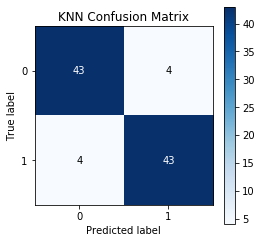

In [51]:
"""CONFUSION MATRIX"""
skplt.metrics.plot_confusion_matrix(y_test, knn_prediction, figsize=(4,4), 
                                   title="KNN Confusion Matrix")

### Classification Report

In [52]:
print(classification_report(y_test, knn_prediction))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.91      0.91      0.91        47

    accuracy                           0.91        94
   macro avg       0.91      0.91      0.91        94
weighted avg       0.91      0.91      0.91        94



## <font color="blue">6.5 SVM 

In [53]:
from sklearn.svm import SVC

svc=SVC(kernel="linear", C=0.3)
svc.fit(X_scaled_train, y_train)

SVC(C=0.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [54]:
svc = joblib.load('svc_model.sav')
svc_prediction = svc.predict(X_scaled_test)

svc_accuracy = svc.score(X_scaled_test, y_test)
svc_accuracy = round(svc_accuracy, 4)*100

accuracy_dict['SVC'] = svc_accuracy
print('Accuracy of prediction - ', svc_accuracy)

Accuracy of prediction -  86.17


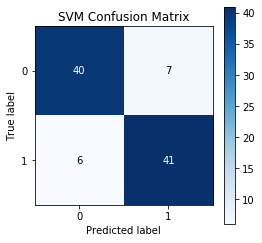

In [55]:
"""CONFUSION MATRIX"""
skplt.metrics.plot_confusion_matrix(y_test, svc_prediction, figsize=(4,4), 
                                   title="SVM Confusion Matrix")

### Classification Report 

In [56]:
print(classification_report(y_test, svc_prediction))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        47
           1       0.85      0.87      0.86        47

    accuracy                           0.86        94
   macro avg       0.86      0.86      0.86        94
weighted avg       0.86      0.86      0.86        94



## <font color="blue">7. Results

In [57]:
"""We create a new dataframe results_df to store values from all the classifiers output"""

results_df = pd.DataFrame()
results_df['actual_label'] = y_test
results_df['logistic_label'] = lr_prediction
results_df['decision_tree_label'] = dt_prediction
results_df['random_forest_label'] = rf_prediction
results_df['knn_label'] = knn_prediction
results_df['svm_label'] = svc_prediction
results_df = results_df.reset_index(drop=True)

### Ensemble of all the five models above and take mode for each data point in the test set

In [58]:
import statistics
results_df['ensemble'] = ""

for i in range(len(results_df)):
    logistic = results_df.logistic_label[i]
    dtree = results_df.decision_tree_label[i]
    rforest = results_df.random_forest_label[i]
    knn = results_df.knn_label[i]
    svm = results_df.svm_label[i]
    acc_list = [logistic, svm, dtree, rforest, knn]
    results_df['ensemble'][i] = statistics.mode(acc_list)

### Confusion Matrix for Ensembled results - 

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(results_df.actual_label), list(results_df.ensemble))
cm

array([[45,  2],
       [ 2, 45]])

### Ensemble Model Accuracy - 

In [60]:
correct = cm[0][0] + cm[1][1]
ensemble_acc = round((correct/cm.sum()),4)*100
print(ensemble_acc)

95.74000000000001


<H3>THE FOLLOWING TABLE SHOWS THE ACTUAL CDR VALUE AND THE VALUES PREDICTED BY VARIOUS CLASSIFIERS.</H3>

In [61]:
results_df.head()

,actual_label,logistic_label,decision_tree_label,random_forest_label,knn_label,svm_label,ensemble
0,1,0,1,1,1,1,1
1,1,0,1,1,1,1,1
2,1,1,1,1,1,1,1
3,1,0,0,0,0,0,0
4,1,1,1,1,1,1,1


## <font color="blue">8. Results

### Final Accuracy -  

In [62]:
"""Accuracy dataframe - """
accuracy_df = pd.DataFrame(data = [accuracy_dict])
accuracy_df['ensemble_acc'] = ensemble_acc

In [63]:
accuracy_df

,LogisticRegression,DecisionTree,RandomForest,KNN,SVC,ensemble_acc
0,85.11,95.74,95.74,91.49,86.17,95.74


## <font color="blue">9. Uniqueness of our Approach and Conclusion

- In this project, the prominent section was FEATURE ENGINEERING where from existing attributes, we calculated a derived attribute MMSE-group.


- This calculation of derived attribute was possible because we studied literature on attributes present in the dataset. Eventually, our work on feature engineering significantly boosted our accuracy results. 


- The high accuracy of the ML models establishes the fact that it can make a significant contribution in the clinical environment.

In [64]:
"""Thank You!"""
"""Author - Satakshi Dubey | 0201cs171063 """

'Author - Satakshi Dubey | 0201cs171063 '